<a href="https://colab.research.google.com/github/ManelSoengas/tutorials/blob/main/Deep_learning_CNN_Beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color='brown'>Deep Learning**</font>

---
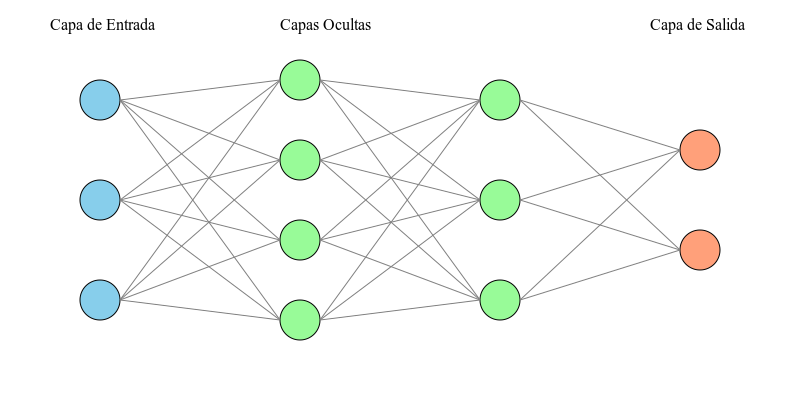

Es considerado un subconjunto del area de desarrollo de Machine Learning. Su estructura se basa en una red neuronal tradicional, simulando la red neuronal biológica del cerebro humano. En la figura se observan las conexiones y las capas que componen una red nuronal (CNN).


Existen dos tipos de redes neuronales:


1.   **Redes convolucionales**. Utilizadas para imágenes.
2.   **Redes recurrentes**. Utilizadas para secuencias de datos, texto o series temporales.




#**<font color='brown'>Arquitectura**</font>

---



En una red neuronal artificial, la ecuación que define el cálculo en cada nodo o neurona es una versión de la ecuación lineal
**y=wx+b**, donde:

*  **y**  representa la salida de la neurona,
* **w** es el peso que multiplica cada entrada (es decir, la importancia o fuerza que el modelo asigna a esa entrada en particular),
*  **x** es la entrada,
* **b** es el término de sesgo (o bias), que permite desplazar la línea de decisión y ajustar la neurona independientemente de las entradas.

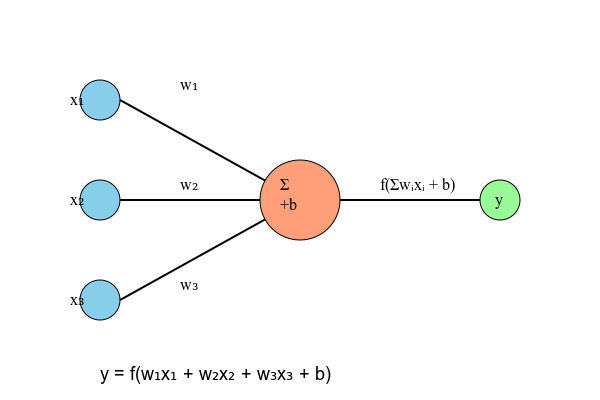

**La salida queda representada por la ecuación:**
\begin{align}
      \ y = \sum_{i=1}^{n} w_i \cdot x_i + b
\end{align}


#**<font color='brown'>Funcionamiento**</font>

---

El entrenamiento se realiza, alimentando a la red neuronal con un conjunto de datos (entradas y salidas) y actualizando aleatoriamente sus pesos (w). A partir de los datos de entrada la NN (red neuronal) produce una salida que es comparada con la salida ideal (error). Devolviendo a la red estas dierencias (backpropagation), y ajustando de neuvo los pesos para reducir el error. El proceso se repite hasta que los pesos quedan estabilizados. El proceso es concido como un problema de optimización.
El **descenso de gradiente** es una técnica utilizada para minimizar el error en redes neuronales, y ajusta los pesos de la red durante el entrenamiento.

Una vez entrenada la NN, se utiliza un conjunto de datos no utilizado en el entrenamiento. El resultado del proceso servirá para evaluar la eficiencia y exactitud de la arquitectura neuronal diseñada.

#**<font color='brown'>Red Neuronal Convolucional**</font>





---
Para tareas de clasificación de imágenes, segmentación y detección de objetos, es de las arquitecturas más utilizadas. La estructura de una CNN es la siguiente:

* **Input Layer (Capa de Entrada)**:

Recibe los datos de entrada, típicamente imágenes, en formato de píxeles. Cada imagen se representa como una matriz de valores de intensidad en cada canal (RGB para imágenes en color).
* **Convolutional Layer (Capa de Convolución)**:

Aplica filtros (o kernels) que recorren la imagen y detectan patrones locales, como bordes, texturas, o formas básicas. Cada filtro produce un mapa de características que representa la respuesta a un patrón específico.
* **Pooling Layer (Capa de Submuestreo o Pooling)**:

Reduce la dimensionalidad de los mapas de características, disminuyendo el número de parámetros y la carga computacional. Los métodos comunes incluyen el max pooling, que selecciona el valor máximo en cada región, y el average pooling, que calcula el promedio.
* **Activation Layer (Capa de Activación)**:

Introduce no linealidad en la red. La función de activación más común en CNNs es ReLU (Rectified Linear Unit), que transforma los valores negativos en cero, permitiendo a la red aprender representaciones no lineales de los datos.
* **Fully Connected Layer (Capa Completamente Conectada)**:

Conecta cada neurona de la capa anterior a todas las neuronas de la siguiente capa. Esta capa toma las características detectadas por las capas convolucionales y las interpreta para clasificar o hacer predicciones.
* **Dropout Layer (Capa de Dropout)**:

De manera aleatoria “apaga” neuronas (es decir, las ignora) durante el entrenamiento para reducir el sobreajuste. Esto ayuda a que la red aprenda patrones más generales en lugar de memorizar los datos de entrenamiento.
* **Output Layer (Capa de Salida)**:

Proporciona la predicción final de la red. Para problemas de clasificación, se suele aplicar una función de activación softmax (para multiclase) o sigmoide (para clasificación binaria), generando probabilidades para cada clase.
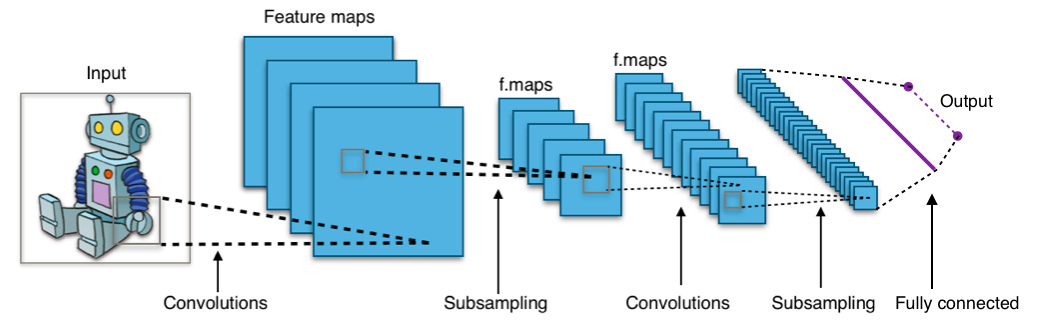
By Aphex34 - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=45679374

#**<font color='brown'>Conceptos**</font>

---


1.   **Función de activación**: Es una función aplicada a las salidas de cada neurona para introducir no linealidad, permitiendo que la red aprenda relaciones complejas. Ejemplos comunes son *ReLU, sigmoid* y *softmax*.
2.  **Función de pérdida**: Es una medida de error que calcula la diferencia entre las predicciones del modelo y las etiquetas reales. La red intenta minimizar esta pérdida para mejorar su precisión. Ejemplos son *categorical cross-entropy* para clasificación y *mean squared error* para regresión.

3. **Optimizador**: Es el algoritmo que ajusta los pesos de la red en cada iteración para reducir la función de pérdida. Ejemplos incluyen *SGD (Stochastic Gradient Descent)* y *Adam*, que ayudan a la red a aprender eficientemente.

4. **Regularización**: Son técnicas que reducen el sobreajuste agregando una penalización a la función de pérdida o limitando los pesos. Ejemplos son *L2* regularization (o Ridge) y *dropout*, que ayudan a que el modelo generalice mejor en datos nuevos.

Más información, [aquí](https://ml-cheatsheet.readthedocs.io/en/latest/nn_concepts.html).

#**<font color='blue'>Ejemplo**</font>

---

A continuación se presenta un ejemplo, sencillo, de una red convolucional para una tarea de clasificación de imágenes que contienen números escritos a mano. El modelo desarrollado interpreta el número.


##**<font color='blue'>Carga de librerías**</font>



---






In [ ]:
!pip install tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

import matplotlib.pyplot as plt


##**<font color='blue'>Carga del conjunto de datos**</font>

---



In [ ]:
# Conjunto de datos

(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


##**<font color='blue'>Visualización de muestras**</font>

---

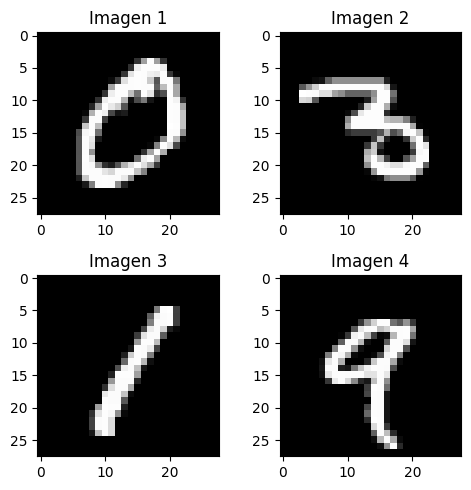

In [ ]:
# Crear una cuadrícula de 2 filas x 2 columnas para mostrar 4 imágenes
plt.figure(figsize=(5, 5))  # Ajustar el tamaño del gráfico

plt.subplot(2, 2, 1)  # 2 filas, 2 columnas, índice 1
plt.imshow(X_train[1], cmap='gray')
plt.title("Imagen 1")

plt.subplot(2, 2, 2)  # 2 filas, 2 columnas, índice 2
plt.imshow(X_train[30], cmap='gray')
plt.title("Imagen 2")

plt.subplot(2, 2, 3)  # 2 filas, 2 columnas, índice 3
plt.imshow(X_train[3], cmap='gray')
plt.title("Imagen 3")

plt.subplot(2, 2, 4)  # 2 filas, 2 columnas, índice 4
plt.imshow(X_train[4], cmap='gray')
plt.title("Imagen 4")

plt.tight_layout()  # Ajustar el espacio entre subplots
plt.show()



##**<font color='blue'>Procesamiento de los datos**</font>

---
Los datos en el dataset MNIST tienen un formato (28, 28, 1), y ajustamos la estructura (reshape) del modelo para que pueda trabajar con estos datos. Cada imagen ya tiene la dimensión (28, 28) y un canal de color (1).

Las redes neuronales realizan cálculos matemáticos con valores flotantes. Si los valores son demasiado grandes (como 255), los gradientes pueden volverse inestables durante el entrenamiento.
Normalizar los datos ayuda a evitar problemas de desbordamiento o números demasiado pequeños durante los cálculos.



In [ ]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [ ]:
# Normaliza las entradas de 0-255 a 0-1
X_train = X_train / 255
X_test = X_test / 255

##**<font color='blue'>Codificar las etiquetas**</font>

---

**to_categorical**, es una función de Keras que transforma las etiquetas de clase (enteros) en vectores binarios en formato one-hot.
One-hot encoding convierte una clase en un vector donde:
* Solo la posición correspondiente a la clase es 1.
* Todas las demás posiciones son 0




```
Etiqueta: 3
Vector one-hot: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]

```



In [ ]:
# Codificar las salidas en formato one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

##**<font color='blue'>Creación del modelo**</font>

---
El proceso consiste en las siguientes fases:

1. Entrada: Imágenes 28x28x1.
2. Extracción de características: Convolución, pooling y dropout.
3. Clasificación: Conecta las características extraídas a través de capas densas para predecir las clases.

La estructura es la siguiente:

1. Creación del modelo
2. Añadir la capa convolucional
3. Añadir la capa de pooling
4. Regularización con Dropout
5. Aplanamiento (Flatten)
6. Capa densa oculta
7. Capa de salida

In [ ]:
# Creación del modelo
model = Sequential()

# Añade una capa convolucional con 32 filtros de tamaño 5x5.
# Estos filtros detectan características locales (como bordes o texturas) en las imágenes.
# Aplica la función de activación ReLU, que introduce no linealidad y acelera el entrenamiento.

model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))

# Reduce las dimensiones espaciales de las características (ancho y alto) seleccionando el valor máximo en regiones pequeñas (por defecto, 2x2).
# Esto ayuda a reducir el tamaño del modelo y extraer características relevantes.

model.add(MaxPooling2D())

#Durante el entrenamiento, desactiva aleatoriamente el 20% de las neuronas de esta capa para reducir el sobreajuste.

model.add(Dropout(0.2))

# Convierte las características bidimensionales (salida de la convolución y pooling) en un vector unidimensional
# para conectarlas con las capas densas (fully connected).

model.add(Flatten())

# Añade una capa completamente conectada con 128 neuronas.
# Usa la activación ReLU para aprender relaciones no lineales.

model.add(Dense(128, activation='relu'))

# Crea la capa de salida con tantas neuronas como clases en el problema (num_classes).
# En el caso de MNIST, serían 10 neuronas (dígitos del 0 al 9).
# Convierte las salidas en probabilidades (suma de 1), indicando la probabilidad de que la imagen pertenezca a cada clase.

model.add(Dense(num_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##**<font color='blue'>Representación del modelo**</font>

---



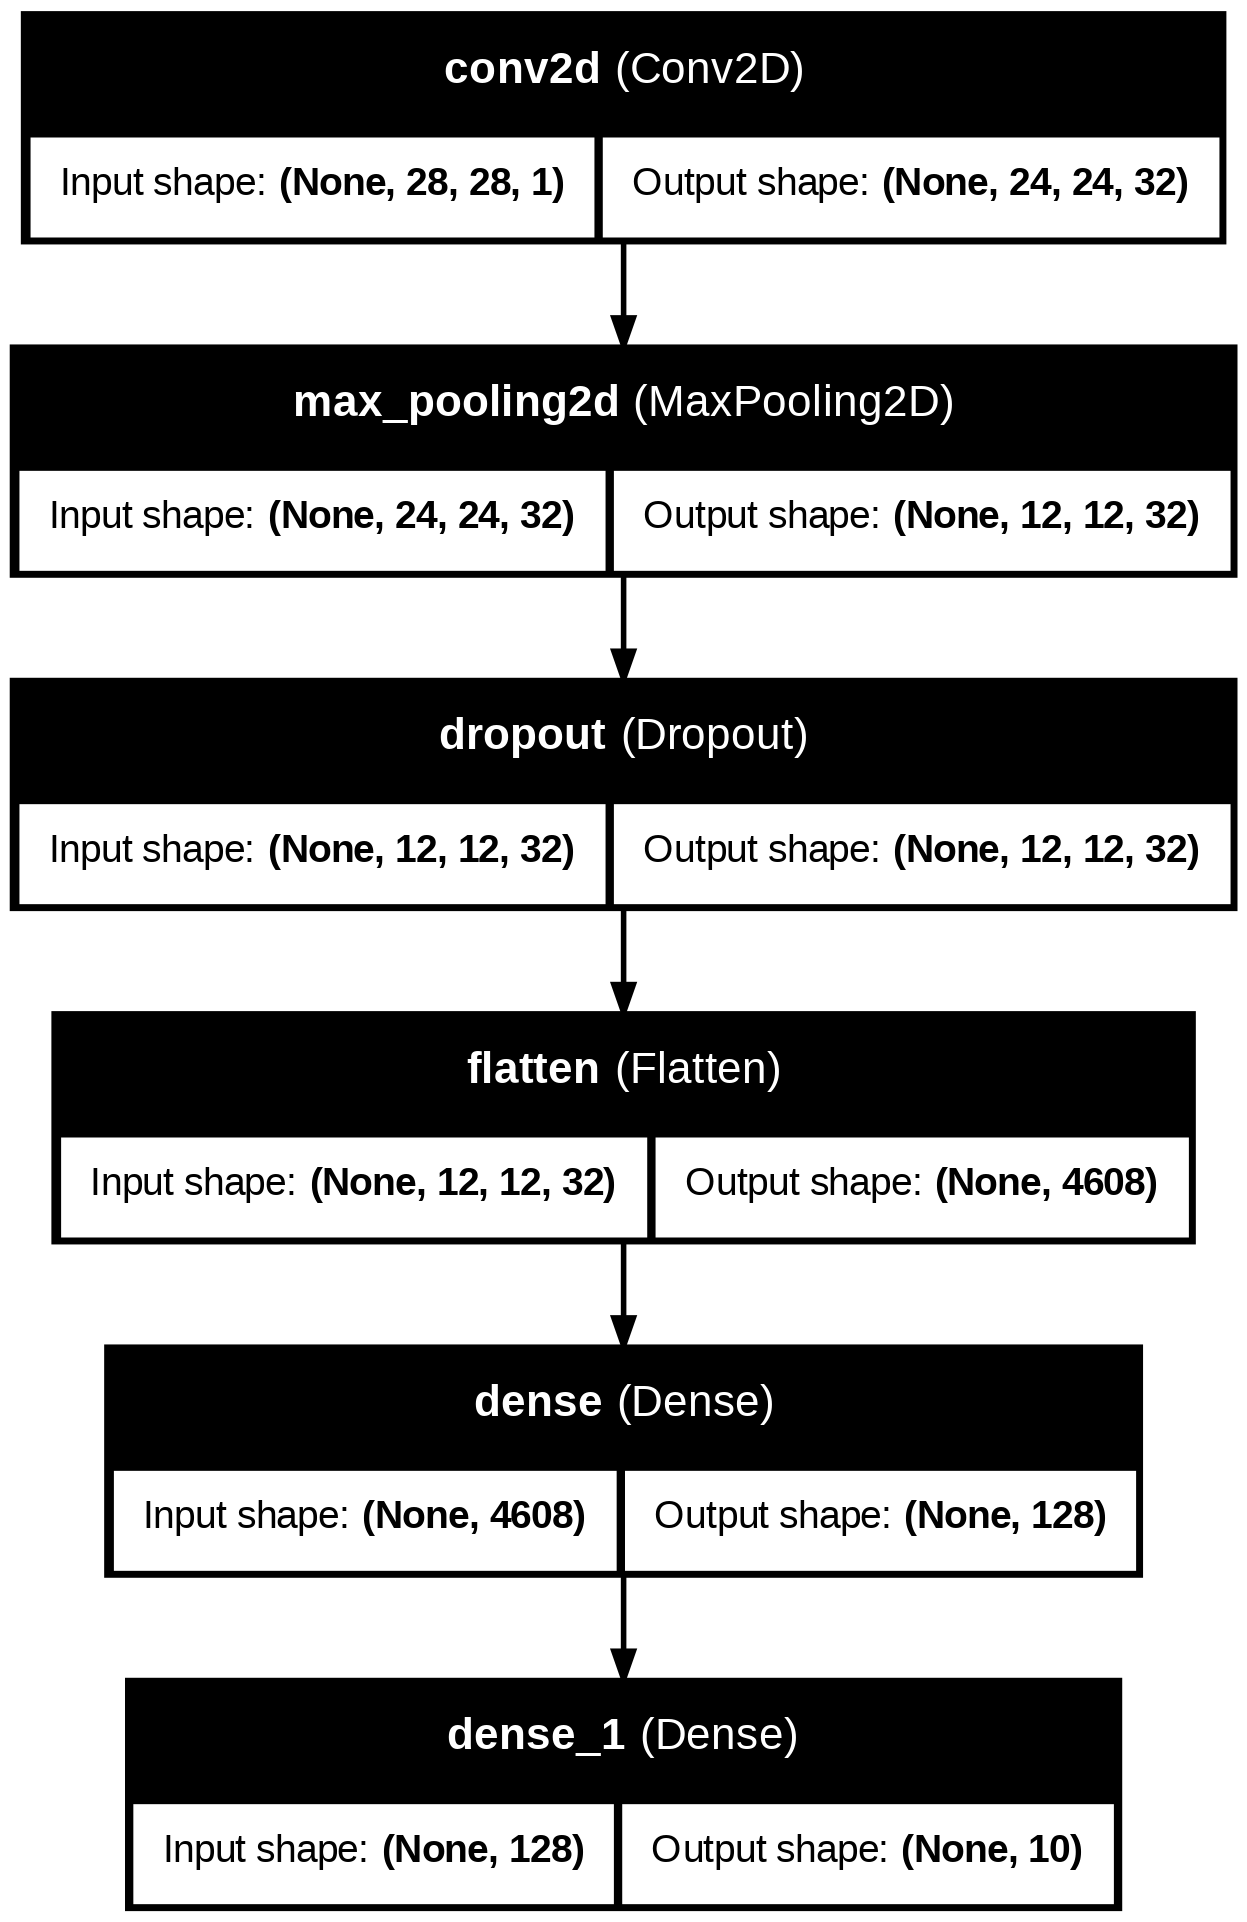

In [ ]:
from tensorflow.keras.utils import plot_model
# Generar la representación gráfica del modelo
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

# Mostrar la imagen
from IPython.display import Image
Image(filename='model_structure.png')

**Parámetros del modelo**

---
Los parámetros en el contexto de un modelo de Deep Learning son los valores que el modelo aprende durante el entrenamiento para realizar predicciones precisas. Estos incluyen:

1. Pesos (Weights).
2. Sesgos (Biases).


In [ ]:
# Mostrar el resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,776,224 (6.78 MB)

 Trainable params: 592,074 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,184,150 (4.52 MB)



##**<font color='blue'>Compilación del modelo**</font>

---
Configuración del modelo para que esté listo para el entrenamiento.

1. La función de pérdida (loss): La función de pérdida mide qué tan bien el modelo predice las etiquetas verdaderas en cada iteración durante el entrenamiento. En este caso, se utiliza categorical_crossentropy, una función de pérdida adecuada para problemas de clasificación multiclase donde las etiquetas están codificadas en formato one-hot.
2. Define cómo se actualizan los pesos del modelo en función del gradiente calculado.
3. Define qué métricas se evaluarán durante el entrenamiento y la evaluación del modelo. Se utiliza accuracy, que mide el porcentaje de predicciones correctas del modelo.

In [ ]:
# Compilar el modelo

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

##**<font color='blue'>Entrenamiento del modelo**</font>

---
El entrenamiento permite que el modelo:

1. Aprenda patrones relevantes en los datos de entrada:

2. Ajuste los pesos de la red neuronal: Durante el entrenamiento, el modelo ajusta los pesos de las conexiones entre neuronas para minimizar la función de pérdida.
3. Generalice el aprendizaje: El objetivo es que el modelo no solo memorice el conjunto de entrenamiento, sino que pueda hacer predicciones precisas en nuevos datos (prueba o producción).

El proceso de entrenamiento consiste en:

1. Inicialización: El modelo comienza con pesos aleatorios.
2. Paso adelante (forward pass): Se calcula la salida del modelo dado un batch de datos.
3. Cálculo de la pérdida: Se compara la salida predicha con las etiquetas verdaderas usando la función de pérdida.
4. Paso hacia atrás (backpropagation): Se calculan los gradientes y se ajustan los pesos para minimizar la pérdida.
5. Repetición: Este proceso se repite para todas las épocas hasta que el modelo converge (minimiza la pérdida).

**Otros valores**:

**Una época** (epoch) representa un ciclo completo en el que el modelo procesa todo el conjunto de datos de entrenamiento una vez. En cada época, el modelo ajusta sus pesos mediante retropropagación, basándose en el error calculado.

**El batch size** es el número de ejemplos que el modelo procesa antes de realizar una actualización de los pesos.
Por ejemplo, con un batch size de 200, el modelo toma bloques de 200 ejemplos del conjunto de datos, calcula los gradientes y actualiza los pesos.

¿Cuál es el valor ideal?
No hay una respuesta única, ya que el valor ideal de epochs y batch_size depende de:

1. Tamaño del conjunto de datos: En datasets pequeños como MNIST, puedes usar valores relativamente bajos para epochs y batch_size debido al bajo costo computacional.
2. Complejidad del modelo: Modelos más complejos podrían necesitar más épocas para ajustarse correctamente.
3. Hardware disponible: Una GPU con más memoria soporta batch sizes más grandes.




In [ ]:
# Entrenamiento del modelo

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8642 - loss: 0.5018 - val_accuracy: 0.9768 - val_loss: 0.0760
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9757 - loss: 0.0822 - val_accuracy: 0.9831 - val_loss: 0.0489
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9841 - loss: 0.0522 - val_accuracy: 0.9858 - val_loss: 0.0435
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9882 - loss: 0.0382 - val_accuracy: 0.9883 - val_loss: 0.0342
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9912 - loss: 0.0297 - val_accuracy: 0.9883 - val_loss: 0.0331
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9913 - loss: 0.0262 - val_accuracy: 0.9875 - val_loss: 0.0355
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9944 - loss: 0.0187 - val_accuracy: 0.9902 - val_loss: 0.0300
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9945 - loss: 0.0173 - val_accuracy: 0.

In [ ]:
# Guardar el modelo entrenado
model.save("mnist_cnn_model.h5")
print("Modelo guardado como mnist_cnn_model.h5")


Modelo guardado como mnist_cnn_model.h5


##**<font color='blue'>Evaluación del modelo**</font>

---
Las gráficas de training loss y validation loss, así como de training accuracy y validation accuracy, son herramientas fundamentales para evaluar el rendimiento de un modelo de aprendizaje profundo a lo largo de las épocas de entrenamiento.

**Training y Validation Loss**:

El loss mide el error del modelo en las predicciones, por lo que estas gráficas permiten observar cómo evoluciona el aprendizaje del modelo.
Una disminución constante del training loss indica que el modelo está ajustándose progresivamente a los datos de entrenamiento.
El validation loss ayuda a detectar posibles problemas de sobreajuste (overfitting). Si este valor comienza a aumentar mientras el training loss sigue disminuyendo, el modelo podría estar especializándose demasiado en los datos de entrenamiento, perdiendo capacidad de generalización.
Training y Validation Accuracy:

**Training y Validation accuracy**

Mide la proporción de predicciones correctas realizadas por el modelo.
Un aumento constante en el training accuracy indica que el modelo está aprendiendo a clasificar correctamente los datos de entrenamiento.
El validation accuracy es clave para evaluar la capacidad del modelo de generalizar a nuevos datos. Una diferencia notable entre training y validation accuracy podría sugerir sobreajuste o subajuste (underfitting).


In [ ]:
# Acceder a la pérdida de entrenamiento y validación
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Si quieres la precisión, también puedes acceder así (si tu modelo tiene métricas de precisión configuradas)
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

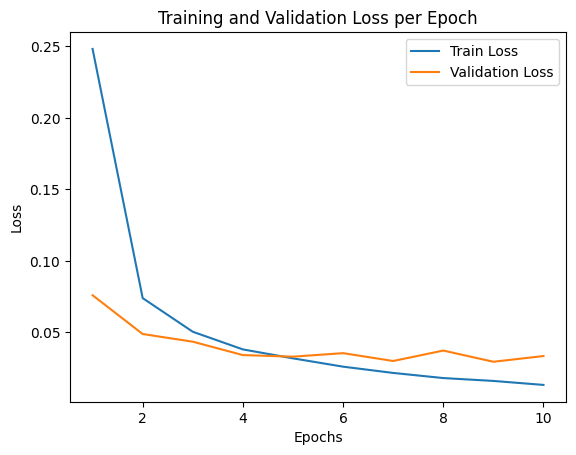

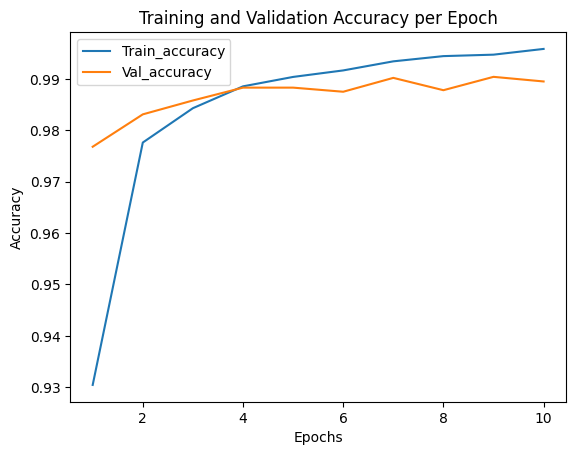

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss per Epoch")
plt.legend()
plt.show()


plt.plot(epochs, train_accuracy, label='Train_accuracy')
plt.plot(epochs, val_accuracy, label='Val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy per Epoch")
plt.legend()
plt.show()

**Rendimiento**:

El modelo parece entrenado de manera adecuada, logrando un alto nivel de precisión tanto en el conjunto de entrenamiento como en el de validación.
No obstante, el aumento leve del validation loss hacia el final podría indicar que con más épocas o un tamaño de modelo mayor, podría haber riesgo de sobreajuste.

##**<font color='blue'>Funcionamiento**</font>

---

La siguiente secuencia permite probar el modelo generado:

1. Cargar el modelo.
2. Seleccionar una muestra del conjunto de datos ***test***.
3. Mostrar la imagen seleccionada.
4. Realizar una predicción.

Lo ideal seria utilizar una imagen que el modelo no haya visto durante el proceso de entrenamiento para evaluar su capacidad de generalización.



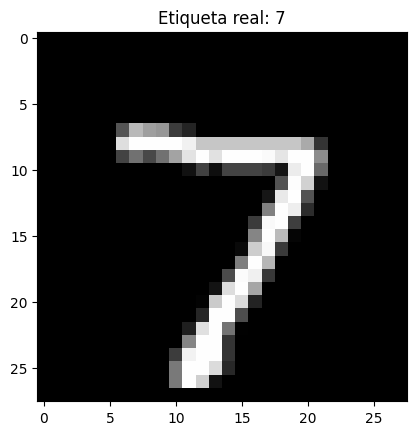

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
Predicción del modelo: 7


In [ ]:
# Cargar el modelo guardado
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Carga del modelo previamente guardado
loaded_model = load_model("mnist_cnn_model.h5")

# Selección de una muestra del conjunto de prueba
sample_index = 0  # Cambia este valor para probar con diferentes imágenes
sample_image = X_test[sample_index]
sample_label = np.argmax(y_test[sample_index])

# Mostrar la imagen que se pasa como entrada
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"Etiqueta real: {sample_label}")
plt.show()

# Redimensionar la imagen para la predicción
sample_image = np.expand_dims(sample_image, axis=0)

# Predicción de la clase
prediction = np.argmax(loaded_model.predict(sample_image), axis=-1)
print(f"Predicción del modelo: {prediction[0]}")
